In [168]:
pip install bertopic umap-learn

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


In [2]:
from bertopic import BERTopic
from datasets import load_dataset
import torch

In [105]:
pip install seaborn


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


In [5]:
full_dataset = load_dataset("mwarchalowski/grants", "no-shorts-no-dups")
labeled_set = load_dataset("mwarchalowski/grants", "labeled_subset")

Generating train split:   0%|          | 0/20000 [00:00<?, ? examples/s]

In [73]:
from sentence_transformers import SentenceTransformer

In [75]:
embedding_model = SentenceTransformer("mixedbread-ai/mxbai-embed-large-v1")

modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/171 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/112k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/670M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.24k [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/711k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/695 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/297 [00:00<?, ?B/s]

In [76]:
embedding_model.encode("Hi, my name is")

array([ 0.40014842, -0.44101954, -0.20170343, ..., -0.26656714,
       -0.18675458, -0.50612813], dtype=float32)

In [35]:
from safetensors.torch import load_file
import json

In [11]:
embeddings = load_file("/workspace/full_embeddings.safetensors")
embeddings["full"].shape

torch.Size([126778, 1024])

In [56]:
_tenz = embeddings["full"][0]
_tenz.toList()

AttributeError: 'Tensor' object has no attribute 'toList'

In [51]:
[x.toList() for in embeddings["full"]]

SyntaxError: invalid syntax (3576653722.py, line 1)

In [58]:
encoded_tensors = [json.dumps(tens.tolist()) for tens in embeddings["full"]]

In [60]:
len(encoded_tensors)

126778

In [65]:
ds = full_dataset["train"]
new_ds = ds.add_column("tensors", encoded_tensors)

In [71]:
new_ds.push_to_hub("mwarchalowski/grants", "no-shorts-no-dups")

Uploading the dataset shards:   0%|          | 0/6 [00:00<?, ?it/s]

Creating parquet from Arrow format:   0%|          | 0/22 [00:00<?, ?ba/s]

Creating parquet from Arrow format:   0%|          | 0/22 [00:00<?, ?ba/s]

Creating parquet from Arrow format:   0%|          | 0/22 [00:00<?, ?ba/s]

Creating parquet from Arrow format:   0%|          | 0/22 [00:00<?, ?ba/s]

Creating parquet from Arrow format:   0%|          | 0/22 [00:00<?, ?ba/s]

Creating parquet from Arrow format:   0%|          | 0/22 [00:00<?, ?ba/s]

README.md:   0%|          | 0.00/1.68k [00:00<?, ?B/s]

CommitInfo(commit_url='https://huggingface.co/datasets/mwarchalowski/grants/commit/221d58eb232247175ba6fcfa9e4535b310bc2393', commit_message='Upload dataset', commit_description='', oid='221d58eb232247175ba6fcfa9e4535b310bc2393', pr_url=None, pr_revision=None, pr_num=None)

In [9]:
embeddings = embedding_model.encode(splits["train"]["abstr"], show_progress_bar=True)

NameError: name 'embedding_model' is not defined

In [17]:
embeddings.shape

(114100, 1024)

In [9]:
type(embeddings)

numpy.ndarray

In [21]:
torch_embeddings = torch.from_numpy(embeddings)

In [22]:
torch_embeddings.shape

torch.Size([114100, 1024])

In [25]:
torch.save(torch_embeddings, "embeddings.pt")

In [ ]:
from safetensors.torch import save_file

In [10]:
tensors = {'embeddings': torch_embeddings}
save_file(tensors, "/workspace/embeddings.safetensors")

NameError: name 'torch_embeddings' is not defined

In [49]:
from umap import UMAP
umap_model = UMAP(n_neighbors=10, n_components=8, min_dist=0.0, metric='cosine', random_state=42)
umap_model

UMAP(metric='cosine', min_dist=0.0, n_components=8, n_neighbors=10, random_state=42)

In [52]:
from hdbscan import HDBSCAN
hdbscan_model = HDBSCAN(min_cluster_size=50, metric='euclidean', cluster_selection_method='eom', prediction_data=True)
hdbscan_model

HDBSCAN(min_cluster_size=50, prediction_data=True)

In [36]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer_model = CountVectorizer(stop_words="english", min_df=2, ngram_range=(1, 2))
vectorizer_model

CountVectorizer(min_df=2, ngram_range=(1, 2), stop_words='english')

In [53]:
topic_model = BERTopic(

  # Pipeline models
  embedding_model=embedding_model,
  umap_model=umap_model,
  hdbscan_model=hdbscan_model,
  vectorizer_model=vectorizer_model,
  # representation_model=representation_model,

  # Hyperparameters
  top_n_words=30,
  verbose=True
)


In [106]:
topics, probs = topic_model.fit_transform(splits["train"]["abstr"], embeddings)


NameError: name 'topic_model' is not defined

In [60]:
topic_model.get_topic_info()

,Topic,Count,Name,Representation,Representative_Docs
0,-1,57440,-1_research_project_cancer_cells,"[research, project, cancer, cells, new, data, ...","[The prostate has rightly been called the ""mos..."
1,0,1557,0_alloys_materials_material_composite,"[alloys, materials, material, composite, mecha...",[Using combinatorial strategies to develop opt...
2,1,1505,1_software_security_br_br gt,"[software, security, br, br gt, lt br, gt, lt,...",[0237835 &lt;br/&gt;David Beazley&lt;br/&gt;Un...
3,2,1333,2_species_evolutionary_populations_evolution,"[species, evolutionary, populations, evolution...","[There are more than 1,8 million described spe..."
4,3,1297,3_students_lt br_lt_br gt,"[students, lt br, lt, br gt, br, gt, science, ...",[Undergraduate students will take part in a th...
...,...,...,...,...,...
249,248,53,248_social_social media_media_online,"[social, social media, media, online, disinfor...",[Recent events in volatile geo-political regio...
250,249,53,249_air pollution_pollution_air_exposure,"[air pollution, pollution, air, exposure, pm2,...",[Exposure to ambient air pollution particles i...
251,250,51,250_pah_exposure_coking_workers,"[pah, exposure, coking, workers, sampling, nit...",[The basic aims of the research are to: - harm...
252,251,51,251_swallowing_masseter_tongue_emg,"[swallowing, masseter, tongue, emg, chewing, m...",[The purpose of this study was to investigate ...


In [76]:
reduced_embeddings = UMAP(n_neighbors=100, n_components=10, min_dist=0.0, metric='cosine').fit_transform(embeddings)

In [1]:
# viz = topic_model.visualize_documents(splits["train"]["title"], reduced_embeddings=reduced_embeddings)


In [86]:
from huggingface_hub import notebook_login
from sentence_transformers.util import cos_sim


In [70]:
notebook_login()

In [77]:
embedding_model

SentenceTransformer(
  (0): Transformer({'max_seq_length': 512, 'do_lower_case': False}) with Transformer model: BertModel 
  (1): Pooling({'word_embedding_dimension': 1024, 'pooling_mode_cls_token': True, 'pooling_mode_mean_tokens': False, 'pooling_mode_max_tokens': False, 'pooling_mode_mean_sqrt_len_tokens': False, 'pooling_mode_weightedmean_tokens': False, 'pooling_mode_lasttoken': False, 'include_prompt': True})
)

In [78]:
labeled_set

DatasetDict({
    train: Dataset({
        features: ['id', 'title', 'abstr', 'text_len', 'label'],
        num_rows: 20000
    })
})

In [81]:
labeled_set["train"].with_format("pandas")[:10]

,id,title,abstr,text_len,label
0,AKA:218223,Gender and humour in early modern England,"Within this project, Academy research fellow A...",150,"**[Academia, Research]**;\n**[Academia, Educat..."
1,CDMRP:PC073790,MicroRNA-Mediated Oncogene Activation in Prost...,The long-term objectives of this proposal are ...,437,"**[Biomedical, Genetics, Oncology]**; **[Rese..."
2,CDMRP:BC991142,Miniaturized DNA Biosensor for Decentralized B...,This Idea Award proposal aims to combine sever...,159,"**[Biomedical, Cancer, Technology]**;\n**[Biot..."
3,NSERC:461412,Bayesian models for long-range population gene...,Two quite different perspectives can be taken ...,292,"**[Biology, Evolution]**;\n**[Research, Phylog..."
4,ARC:DP120100053,DP120100053-The University of Queensland,How economic prosperity hardens attitudes towa...,65,"**[Social Issues, Economics]**;\n**[Politics, ..."
5,NSF:0835381,Collaborative Research: Enabling Robust Learni...,Personalized instruction instruction that targ...,415,"**[Education, Technology]**;\n**[Natural Langu..."
6,CDMRP:TS100078,Genome-Wide Analysis of Translational Control ...,Tuberous Sclerosis (TS) is a genetic disease s...,230,"**[Biomedical, Genetics]**; **[Biomedical, Dru..."
7,CORDIS:29288,Ceramic building materials with improved insul...,The viability of the project has been demonstr...,94,"**[Engineering, Industrial]**; **[Materials, I..."
8,NIH:10536197,CMV infection impact on placental immunometabo...,PROJECT SUMMARY/ABSTRACT Cytomegalovirus (CMV)...,307,"**[Biomedical, Immunology]**; **[Biomedical, V..."
9,SNSF:P500PS_210882,Ongoing,The project is based on ethnographic research ...,389,"**[Anthropology, Politics]**;\n**[Social Issue..."


In [158]:
results = embedding_model.encode(labeled_set["train"].select(range(25))["abstr"])
results

array([[ 0.34023383, -0.16402413, -0.07701126, ..., -0.5465809 ,
        -0.09317831,  0.18328194],
       [ 0.71682733, -0.06218627,  0.6308938 , ..., -0.03194467,
        -0.4893888 , -0.04331722],
       [-0.00551694, -0.10450007,  0.61883104, ...,  0.28972685,
         0.23846415, -1.1424844 ],
       ...,
       [ 0.6264618 ,  0.4043459 ,  0.8879811 , ...,  0.16976853,
         0.06222642, -0.05370221],
       [-0.0400166 , -0.12779565, -0.33984444, ...,  0.04383183,
        -0.11523374,  0.455491  ],
       [ 0.817299  , -0.44093966, -0.09934245, ..., -0.6485816 ,
        -0.51311857,  0.5706433 ]], dtype=float32)

In [118]:
cos_sim(results[0], results[:])

tensor([[1.0000, 0.3852, 0.3879, 0.4764, 0.4449, 0.5154, 0.3670, 0.3790, 0.4071,
         0.5267, 0.3604, 0.4757, 0.3574, 0.3768, 0.5296, 0.4662, 0.3838, 0.5466,
         0.5676, 0.4754]])

In [220]:
from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances

In [160]:
sims = cosine_similarity(results)

In [161]:
import seaborn as sns
import matplotlib.pylab as plt


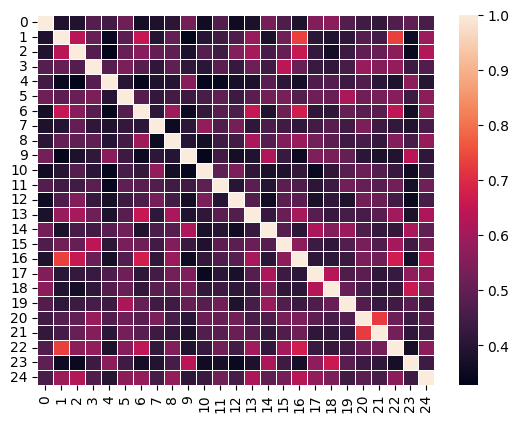

In [162]:
ax = sns.heatmap(sims, linewidth=0.5)
plt.show()


In [165]:
labeled_set["train"].with_format("pandas")[:25]

,id,title,abstr,text_len,label
0,AKA:218223,Gender and humour in early modern England,"Within this project, Academy research fellow A...",150,"**[Academia, Research]**;\n**[Academia, Educat..."
1,CDMRP:PC073790,MicroRNA-Mediated Oncogene Activation in Prost...,The long-term objectives of this proposal are ...,437,"**[Biomedical, Genetics, Oncology]**; **[Rese..."
2,CDMRP:BC991142,Miniaturized DNA Biosensor for Decentralized B...,This Idea Award proposal aims to combine sever...,159,"**[Biomedical, Cancer, Technology]**;\n**[Biot..."
3,NSERC:461412,Bayesian models for long-range population gene...,Two quite different perspectives can be taken ...,292,"**[Biology, Evolution]**;\n**[Research, Phylog..."
4,ARC:DP120100053,DP120100053-The University of Queensland,How economic prosperity hardens attitudes towa...,65,"**[Social Issues, Economics]**;\n**[Politics, ..."
5,NSF:0835381,Collaborative Research: Enabling Robust Learni...,Personalized instruction instruction that targ...,415,"**[Education, Technology]**;\n**[Natural Langu..."
6,CDMRP:TS100078,Genome-Wide Analysis of Translational Control ...,Tuberous Sclerosis (TS) is a genetic disease s...,230,"**[Biomedical, Genetics]**; **[Biomedical, Dru..."
7,CORDIS:29288,Ceramic building materials with improved insul...,The viability of the project has been demonstr...,94,"**[Engineering, Industrial]**; **[Materials, I..."
8,NIH:10536197,CMV infection impact on placental immunometabo...,PROJECT SUMMARY/ABSTRACT Cytomegalovirus (CMV)...,307,"**[Biomedical, Immunology]**; **[Biomedical, V..."
9,SNSF:P500PS_210882,Ongoing,The project is based on ethnographic research ...,389,"**[Anthropology, Politics]**;\n**[Social Issue..."


In [144]:
import re

In [167]:
new_labeled_set

DatasetDict({
    train: Dataset({
        features: ['id', 'title', 'abstr', 'text_len', 'label', 'clean_labels'],
        num_rows: 20000
    })
})

In [235]:
from umap import UMAP
from sklearn.preprocessing import normalize, MinMaxScaler

In [259]:
umapreducer = UMAP(n_components=5, min_dist=0, n_neighbors=15)

In [260]:
reduced = umapreducer.fit_transform(results)
reduced

array([[10.474885  ,  8.311661  ,  3.441533  , -1.229059  ,  9.250534  ],
       [ 9.771612  ,  7.7514687 ,  4.9066133 , -2.7731423 , 10.46543   ],
       [ 9.847785  ,  7.816619  ,  4.386459  , -3.1591995 , 10.701777  ],
       [10.040245  ,  7.967499  ,  4.64008   , -2.0521715 ,  9.946189  ],
       [10.8776    ,  8.0635195 ,  2.9329681 , -1.0984683 ,  9.155666  ],
       [10.051609  ,  8.101068  ,  3.9644363 , -1.5718741 ,  9.880387  ],
       [ 9.453593  ,  7.682854  ,  4.885847  , -3.210183  , 10.240344  ],
       [10.945493  ,  8.501253  ,  3.549022  , -2.366962  ,  9.853427  ],
       [ 9.393466  ,  7.3697104 ,  4.595171  , -2.9134026 , 10.0052    ],
       [10.488457  ,  8.186213  ,  2.8492327 , -0.99272156,  9.010959  ],
       [10.694962  ,  8.396     ,  3.5376165 , -2.6193588 , 10.146518  ],
       [ 9.997969  ,  7.7944746 ,  3.6952624 , -2.248604  ,  9.778524  ],
       [10.697834  ,  8.345533  ,  3.81847   , -2.8754764 , 10.337844  ],
       [ 9.400514  ,  7.516836  ,  4.3

In [262]:
reduced_sim = euclidean_distances(reduced)
scaled_reduced = MinMaxScaler().fit_transform(1 - reduced_sim)
scaled_reduced

array([[1.00000000e+00, 1.96961313e-01, 1.79440022e-01, 2.76106626e-01,
        7.91796803e-01, 5.09046853e-01, 1.81801319e-01, 4.12443042e-01,
        1.97347492e-01, 8.01315904e-01, 2.10765630e-01, 3.00449789e-01,
        1.95569158e-01, 1.89558923e-01, 8.35640788e-01, 2.51720935e-01,
        1.76225305e-01, 8.16680670e-01, 8.27975512e-01, 6.96031213e-01,
        2.84816265e-01, 2.64720112e-01, 2.13600993e-01, 8.14058542e-01,
        1.84167206e-01],
       [1.12375140e-01, 1.00000000e+00, 7.89288521e-01, 5.79726994e-01,
        8.89278650e-02, 1.72358483e-01, 8.33764493e-01, 1.20048553e-01,
        7.58076549e-01, 8.31595063e-02, 1.47496521e-01, 2.31240988e-01,
        3.80703926e-01, 7.30284214e-01, 8.80908370e-02, 6.40052259e-01,
        8.68247390e-01, 1.11389041e-01, 1.04976535e-01, 1.06883347e-01,
        2.80471563e-01, 5.10323644e-01, 8.58790994e-01, 8.94549489e-02,
        6.98427737e-01],
       [7.73954391e-02, 7.85661340e-01, 1.00000000e+00, 4.11440134e-01,
        8.2618

array([<Axes: >, <Axes: >], dtype=object)

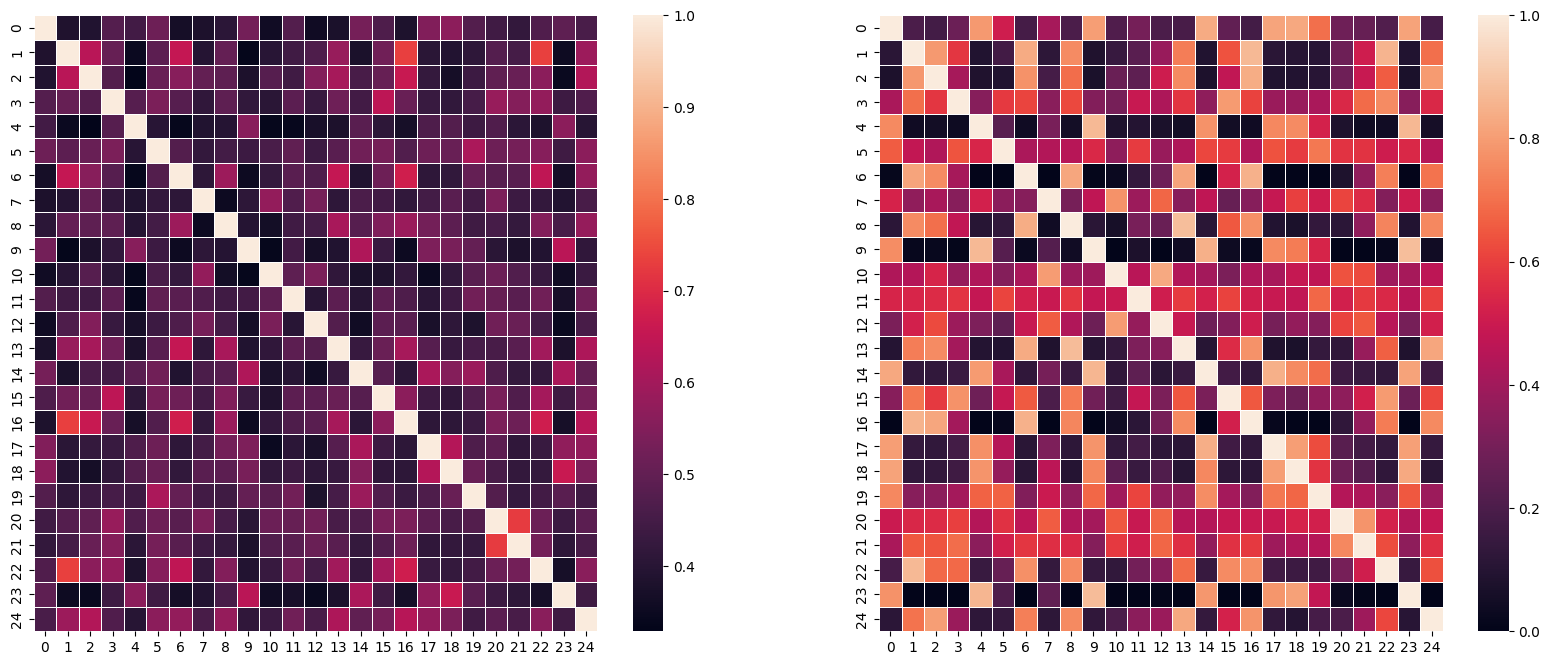

In [263]:
z, axs = plt.subplots(1, 2, figsize=(20, 8))
ax = sns.heatmap(sims, linewidth=0.5, ax=axs[0])
ax = sns.heatmap(scaled_reduced, linewidth=0.5, ax=axs[1])
axs

In [296]:
import numpy as np

In [265]:
new_labeled_set["train"].with_format("pandas")[:25]

,id,title,abstr,text_len,label,clean_labels
0,AKA:218223,Gender and humour in early modern England,"Within this project, Academy research fellow A...",150,"**[Academia, Research]**;\n**[Academia, Educat...","Academia, Research, Academia, Education"
1,CDMRP:PC073790,MicroRNA-Mediated Oncogene Activation in Prost...,The long-term objectives of this proposal are ...,437,"**[Biomedical, Genetics, Oncology]**; **[Rese...","Biomedical, Genetics, Oncology, Research, Micr..."
2,CDMRP:BC991142,Miniaturized DNA Biosensor for Decentralized B...,This Idea Award proposal aims to combine sever...,159,"**[Biomedical, Cancer, Technology]**;\n**[Biot...","Biomedical, Cancer, Technology, Biotechnology,..."
3,NSERC:461412,Bayesian models for long-range population gene...,Two quite different perspectives can be taken ...,292,"**[Biology, Evolution]**;\n**[Research, Phylog...","Biology, Evolution, Research, Phylogenetics"
4,ARC:DP120100053,DP120100053-The University of Queensland,How economic prosperity hardens attitudes towa...,65,"**[Social Issues, Economics]**;\n**[Politics, ...","Social Issues, Economics, Politics, Discrimina..."
5,NSF:0835381,Collaborative Research: Enabling Robust Learni...,Personalized instruction instruction that targ...,415,"**[Education, Technology]**;\n**[Natural Langu...","Education, Technology, Natural Language Proces..."
6,CDMRP:TS100078,Genome-Wide Analysis of Translational Control ...,Tuberous Sclerosis (TS) is a genetic disease s...,230,"**[Biomedical, Genetics]**; **[Biomedical, Dru...","Biomedical, Genetics, Biomedical, Drug Develop..."
7,CORDIS:29288,Ceramic building materials with improved insul...,The viability of the project has been demonstr...,94,"**[Engineering, Industrial]**; **[Materials, I...","Engineering, Industrial, Materials, Insulation"
8,NIH:10536197,CMV infection impact on placental immunometabo...,PROJECT SUMMARY/ABSTRACT Cytomegalovirus (CMV)...,307,"**[Biomedical, Immunology]**; **[Biomedical, V...","Biomedical, Immunology, Biomedical, Virology"
9,SNSF:P500PS_210882,Ongoing,The project is based on ethnographic research ...,389,"**[Anthropology, Politics]**;\n**[Social Issue...","Anthropology, Politics, Social Issues, Human R..."


In [358]:
def encode(text, label):
    return np.array([embedding_model.encode(text), embedding_model.encode(label)])

In [570]:
import pandas as pd

In [575]:
pd.DataFrame([x.split(",")[0] for x in new_labeled_set["train"].with_format("pandas")[:]["clean_labels"]]).value_counts()[:100]

0                
Biomedical           6244
Engineering          1218
Physics               653
Education             616
Environment           573
                     ... 
AI                     18
Cognitive Science      17
Electronics            17
Medical                17
Food Science           17
Name: count, Length: 100, dtype: int64

In [ ]:
frame = new_labeled_set["train"].with_format("pandas")[:2000]
_embeddings = frame["abstr"].to_numpy()
# _clean_labels = frame["clean_labels"].to_numpy()
_clean_labels = [x.split(",")[0] for x in frame["clean_labels"].to_numpy()]
# np.random.shuffle(_clean_labels)
comparable_encodings = [encode(text,label) for text,label in zip(_embeddings, _clean_labels)]

In [ ]:
similarities = [cos_sim(x,y) for x,y in comparable_encodings]

In [ ]:
def stats(similarities):
    clean_similarities = np.squeeze(np.array(similarities))
    return (np.mean(clean_similarities), np.std(clean_similarities))

In [ ]:
stats(similarities)

In [562]:
 stats(similarities)

(0.70190644, 0.066393726)

In [538]:
stats(similarities) 

(0.46077788, 0.06535393)